#                                EDMONTON AIR QUALITY PREDICTION

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

## INTRODUCTION:
In order to address the air pollution levels, the scope of our project is to predict Edmonton's air quality.  By accurately predicting air quality, we can provide valuable information to citizens, policymakers, and stakeholders, enabling them to take proactive measures to mitigate pollution and its adverse effects. ​

Our project, leverage machine learning techniques and historical air quality data to create a reliable predictive model, aiming to promote sustainable urban living in Edmonton.

## AQI (Air Quality Health Index)

The Air Quality Health Index (AQI) is used to measure and report air quality in Edmonton, Canada. The AQHI is a scale from 1 to 10+, with higher values indicating poorer air quality and greater potential health risks.

The AQHI in Edmonton is calculated based on the concentration levels of three pollutants: ground-level ozone (O3), fine particulate matter (PM2.5), and nitrogen dioxide (NO2). The calculation takes into account the health effects of each pollutant and weights them according to their relative importance.

To calculate the AQHI, the concentration levels of each pollutant are first measured and reported in micrograms per cubic meter (µg/m³). The measured values are then converted into an AQHI value using the following equation:

AQHI = (1/3)(AQHIozone + AQHIpm2.5 + AQHIno2)


Once the AQHI values for each pollutant are calculated, they are averaged together to produce a single AQHI value for the area. The resulting AQHI value is then reported to the public through various channels, including local news media, government websites, and mobile applications.

### <li>1- DATA SAMPLING AND COLLECTION:

When working with air quality data, it is important to ensure that the data has been collected and sampled properly to ensure its accuracy and reliability. We evaluate the quality of the data sampling and collection in the dataset by following:

<li>Checked the data source: Ensure that the data is from a reputable source, such as a government agency or a recognized research institution.

<li>Check the sampling frequency: It is important to ensure that the data has been collected at a sufficient frequency to capture variations in air quality over time. Ideally, this data is collected continuously on daily bases.

<li>Check the sampling location: The sampling location is representative of the area being monitored. The location chosen based on factors such as proximity to pollution sources, wind patterns, and topography.

<li>Check the sampling method: The sampling is appropriate for the pollutants being monitored as measuring of pollutants is taken care as some require continuous monitoring, while others can be measured through periodic sampling.<br>

####  All the above points have be taken into account when we include following datasets:

##### <li> Air quality data for the years 2015, 2016, 2017, and 2018 for the City of Edmonton(City of Edmonton Open Data portal)
https://data.edmonton.ca/Environmental-Services/Edmonton-Area-Air-Quality-Readings-Historical-/44dx-d5qn
##### <li> Weather data - (2015-2019-Government Data)
https://climate.weather.gc.ca/historical_data/search_historic_data_e.html
##### <li>Wildfire data - (2015-2018- Government Data)
https://www.alberta.ca/wildfire-maps-and-data.aspx
##### <li>Traffic data - (2015-2018 - City of Edmonton Traffic Data)
https://www.edmonton.ca/transportation/traffic_reports/traffic-volumes-turning-movements
##### <li>Hourly reading - (2015-2018 - Government Data)
https://airdata.alberta.ca/reporting/Download/MultipleParameters
##### <li>Communities AQHI - ( Govermnet Data) 
https://airquality.alberta.ca/map


#### <li> Loading  Air Quality data for years 2015, 2016, 2017 and 2018 for City of Edmonton:

In [104]:
df_2015 = pd.read_csv("Edmonton_Area_Air_Quality_Readings__2015.csv")
df_2016 = pd.read_csv("Edmonton_Area_Air_Quality_Readings__2016.csv")
df_2017 = pd.read_csv("Edmonton_Area_Air_Quality_Readings__2017.csv")
df_2018 = pd.read_csv("Edmonton_Area_Air_Quality_Readings__2018.csv")

### <li>2- DATA CLEANING AND PREPARATION:

Cleaning, handling missing values, removing duplicates, and correcting data entry errors.

###  Data Preparation: 

- Originally have a dataset of 2015 ~ 2019 daily AQI (Edmonton Area Air Quality Readings.csv) and other relative parameters for the 3 weather monitoring stations that in Edmonton.
- There were missing values in 2019 data. Therefore we splited the data by years from 2015 to 2018.
- Combine All the datasets(2015, 2016, 2017, 2018) 
- Pivoting the combined dataframe
- Saved with Final_Data.csv

Edmonton_Area_Air_Quality_Readings (2015 to 2018) file:
- This dataset is characterized by daily and different parameter measured at specfic monitoring stations.
- Each station has precise spatial information, such as latitude, longitude, and Geo Location.
- Each parameter measured has its own units, like Nitric Oxide (ppm), Outdoor Air Temperature (deg c), Std. Dev. of Wind Speed (km/hr 10m), Ethylene (ug/m3), etc.

In [105]:
df_2015.sample(3)

Row ID  \
70646  Edmonton South-2015-10-08-Wind Direction-186.4167   
11879  Edmonton McIntyre-2015-02-21-Std. Dev. of Wind...   
64246    Scotford (Temporary)-2015-09-15-o-Xylene-0.0000   

      Monitoring Station Name           Parameter Measured  \
70646          Edmonton South               Wind Direction   
11879       Edmonton McIntyre  Std. Dev. of Wind Direction   
64246    Scotford (Temporary)                     o-Xylene   

       Average Daily Value Unit of Measure Date Measured   Latitude  \
70646             186.4167         deg 10m  Oct 08, 2015  53.500139   
11879              19.3333         deg 10m  Feb 21, 2015  53.486056   
64246               0.0000           ug/m3  Sep 15, 2015  53.756786   

        Longitude                   Geo Location  
70646 -113.526056  POINT (-113.526056 53.500139)  
11879 -113.464583  POINT (-113.464583 53.486056)  
64246 -113.028947  POINT (-113.028947 53.756786)

In [106]:
df_2015[['Parameter Measured', 'Unit of Measure']].value_counts()

Parameter Measured               Unit of Measure
Outdoor Air Temperature          deg c              7760
Wind Speed                       km/hr 10m          7421
Wind Direction                   deg 10m            7421
Total Oxides Of Nitrogen         ppm                6729
Nitric Oxide                     ppm                6729
Nitrogen Dioxide                 ppm                6729
Sulphur Dioxide                  ppm                6693
PM2.5 Mass                       ug/m3              5932
Std. Dev. of Wind Direction      deg 10m            4915
Ozone                            ppm                4375
Std. Dev. of Wind Speed          km/hr 10m          3489
Relative Humidity                percent            3243
Total Hydrocarbons               ppm                2898
Hydrogen Sulphide                ppm                2366
Non-methane Hydrocarbons         ppm                2074
Methane                          ppm                2074
Carbon Monoxide                  ppm   

Renaming 'Date measured' column to 'Data/Time' and changed the Date/Time columns into datatime type.

In [107]:
df_2015['Date Measured'] = df_2015['Date Measured'].astype('datetime64[ns]')
df_2015 = df_2015.rename(columns={'Date Measured': 'Date/Time'})

In [108]:
df_2016['Date Measured'] = df_2016['Date Measured'].astype('datetime64[ns]')
df_2016 = df_2016.rename(columns={'Date Measured': 'Date/Time'})

In [109]:
df_2017['Date Measured'] = df_2017['Date Measured'].astype('datetime64[ns]')
df_2017 = df_2017.rename(columns={'Date Measured': 'Date/Time'})


In [110]:
df_2018['Date Measured'] = df_2018['Date Measured'].astype('datetime64[ns]')
df_2018 = df_2018.rename(columns={'Date Measured': 'Date/Time'})

Filtering data for three Edmonton Weather monitoring stations - Central, South, East

In [111]:
joined_df_AQ = df_2015[df_2015['Monitoring Station Name'].isin({'Edmonton Central','Edmonton South', 'Edmonton East'})]

Combining Air quality data reading for city of Edmonton for year 2015, 2016, 2017 and 2018

In [112]:
joined_df_AQ1 = pd.concat([df_2015,df_2016])
joined_df_AQ2 = pd.concat([df_2017,df_2018])
joined_df_AQ = pd.concat([joined_df_AQ1,joined_df_AQ2])

Renaming the columm

In [113]:
joined_df_AQ = joined_df_AQ.rename(columns={'Date Measured': 'Date/Time'})

Changing date type of the 'Date/Time' column

In [114]:
joined_df_AQ['Date/Time'] = joined_df_AQ['Date/Time'].astype('datetime64[ns]')
joined_df_AQ.sample(1)

Row ID  \
21702  Fort Saskatchewan-92 St and 96 Ave-2016-03-22-...   

                  Monitoring Station Name        Parameter Measured  \
21702  Fort Saskatchewan-92 St and 96 Ave  Non-methane Hydrocarbons   

       Average Daily Value Unit of Measure  Date/Time   Latitude   Longitude  \
21702                  0.0             ppm 2016-03-22  53.698756 -113.222831   

                        Geo Location  
21702  POINT (-113.222831 53.698756)

In the original dataset, the column 'Parameter Measured' contains all the parameters that we need later for our prediction model.

So we were pivoting the combined dataframe

In [115]:
# pivoting 'joined_df_AQ' on 'Date/Time':
pivoted_df = joined_df_AQ.pivot_table(index='Date/Time', columns='Parameter Measured', values='Average Daily Value', aggfunc='mean')
pivoted_df.reset_index(inplace=True)
pivoted_df= pivoted_df.sort_values(by='Date/Time')

After all the cleaning completed, and pivoted the table we wanted, saved it to the final data set to Final_Data.csv

In [116]:
pivoted_df.to_csv('Final_Data.csv', index=False)

In [117]:
df4 = pd.read_excel('Final_Data.xlsx')
df4.sample(1)

Date/Time  Air Quality Index  Carbon Monoxide  Hydrogen Sulphide  \
1331  2018-08-24             1.5163         0.213033                0.0   

       Methane  Nitric Oxide  Nitrogen Dioxide  Non-methane Hydrocarbons  \
1331  2.001433      0.003167          0.003933                    0.0087   

      Outdoor Air Temperature   Ozone  PM10 Mass  PM2.5 Mass  \
1331                     9.85  0.0077        NaN    4.145567   

      Relative Humidity  Std. Dev. of Wind Direction  Sulphur Dioxide  \
1331           82.04165                     18.29165              0.0   

      Total Hydrocarbons  Total Oxides Of Nitrogen  Wind Direction  Wind Speed  
1331            2.010133                    0.0071        332.5625    10.71665

Other than the Final_Data.csv, we also did some cleanings and preparations to make sure later other datasets were able to be useful for our model analysis.
- Weather_data_2016 to 2019
- Wildfire_2015to2018
- Traffic_data
- Hourly_Readings_2015 to current

Weather_data (2015 to 2019) file:
- This dataset contains station names, station IDs, various temperatures, such as maximum temperature, total snow, and total precipitation.
- Each station has precise spatial information.
- Each parameter measured has its own units.
- Most of parameters are NaN values, we will drop them later.

In [118]:
df_weather_2015 = pd.read_csv("Weather_data_2015.csv")
df_weather_2015.sample(3)

Longitude (x)  Latitude (y)         Station Name  Climate ID   Date/Time  \
291        -113.52         53.57  EDMONTON BLATCHFORD     3012209  2015-10-19   
187        -113.52         53.57  EDMONTON BLATCHFORD     3012209  2015-07-07   
142        -113.52         53.57  EDMONTON BLATCHFORD     3012209  2015-05-23   

     Year  Month  Day  Data Quality  Max Temp (°C)  ... Total Snow (cm)  \
291  2015     10   19           NaN           17.4  ...             NaN   
187  2015      7    7           NaN           21.3  ...             NaN   
142  2015      5   23           NaN           27.7  ...             NaN   

     Total Snow Flag Total Precip (mm)  Total Precip Flag Snow on Grnd (cm)  \
291                M               0.0                NaN               NaN   
187                M               0.0                NaN               NaN   
142                M               0.0                NaN               NaN   

     Snow on Grnd Flag Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
291                NaN                       NaN                   NaN   
187                NaN                       NaN                   NaN   
142                NaN                       NaN                   NaN   

    Spd of Max Gust (km/h)  Spd of Max Gust Flag  
291                    <31                   NaN  
187                    <31                   NaN  
142                    <31                   NaN  

[3 rows x 31 columns]

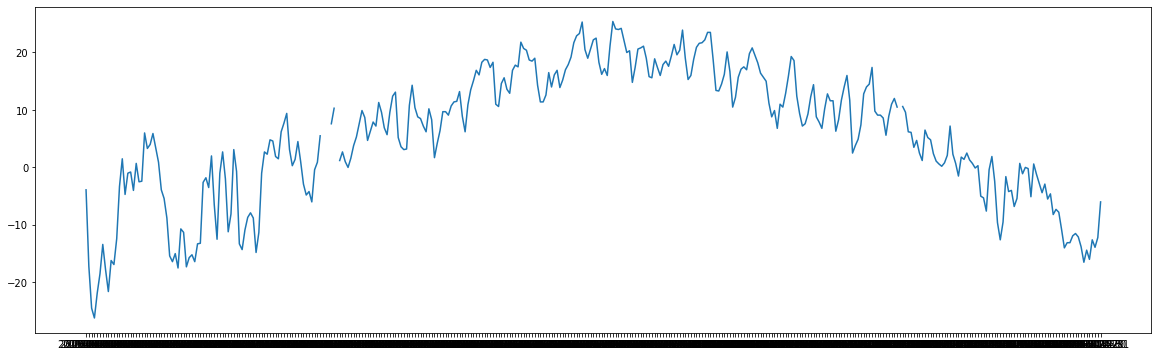

In [119]:
# this dataset Weather_data_2016 to 2018 provides the monitoring stations Longitude and Latitude, alone with different temperatures recordings.
df_weather_2015['datetime'] = pd.to_datetime(df_weather_2015['Date/Time'])
df_weather_2015 = df_weather_2015.drop(['Longitude (x)', 'Latitude (y)', 'Data Quality','Climate ID', 'Max Temp Flag',
                                        'Year', 'Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag', 'Cool Deg Days Flag',
                                        'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag', 'Dir of Max Gust Flag', 
                                        'Spd of Max Gust Flag', 'Total Snow (cm)', 'Total Rain (mm)'], axis=1)


# to better understand the data, we were plotting the data.
plt.figure(figsize=(20, 6))
plt.plot(df_weather_2015['Date/Time'], df_weather_2015['Mean Temp (°C)'])

grouped = df_weather_2015.groupby('Month')
mean_temp = grouped['Mean Temp (°C)'].mean()

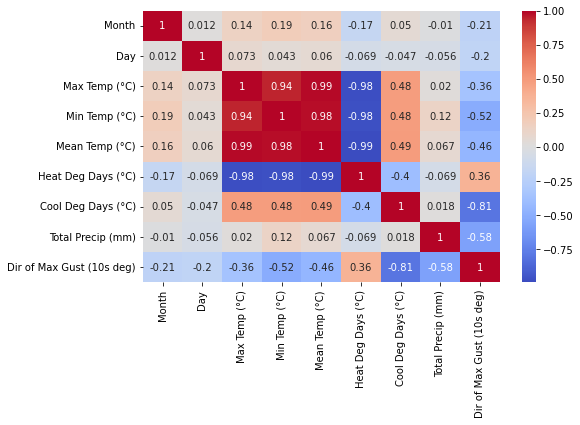

In [120]:
corr_matrix = df_weather_2015.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

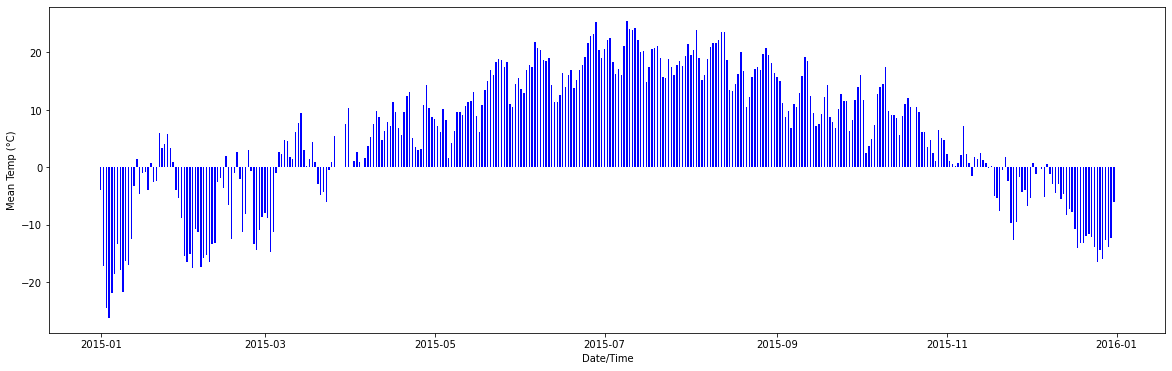

In [121]:
# tried to combine the weather_2017 dataset with the Edmonton_Area_Air_Quality_Readings__2017.csv
df_weather_2015['Date/Time'] = df_weather_2015['Date/Time'].astype('datetime64[ns]')
df_2015_cb = df_2015[df_2015['Parameter Measured'] == 'Carbon Monoxide']
df_combine = pd.merge(df_weather_2015, df_2015_cb, on = 'Date/Time', how = 'inner')

# Create a bar chart using Matplotlib
plt.figure(figsize=(20, 6))
ax = plt.gca()
ax.bar(df_combine['Date/Time'], df_combine['Mean Temp (°C)'], color='b', width=0.5)
ax.set_xlabel('Date/Time')
ax.set_ylabel('Mean Temp (°C)')

plt.show()

Wildfire_2015to2018 file:
- This dataset was recorded to be at the individual fire level.
- It contains fire name, fire year, assessment datetime, assessment hectares, current size, size class, fire location latitude and longitude, fire origin, and other related fields.

In [122]:
# another dataset Wildfire_2015to2018.csv. We tried to explore if the wildfire can be predicted and the relationship with Edmonton Air Quality.
fire = pd.read_csv('Wildfire_2015to2018.csv')
fire["assessment_datetime"] = pd.to_datetime(fire["assessment_datetime"]).dt.date
fire['count']=fire.groupby('assessment_datetime')['fire_number'].transform('count')
fire.sample(3)

fire_number fire_name  fire_year assessment_datetime  \
1538      MWF089       NaN       2017          2017-09-01   
1832      HWF183       NaN       2018          2018-07-28   
1025      MWF062       NaN       2016          2016-06-23   

      assessment_hectares  current_size size_class  fire_location_latitude  \
1538                 0.01          0.01          A               56.250233   
1832                 2.00          1.50          B               59.371358   
1025                12.00         80.10          D               58.641867   

      fire_location_longitude      fire_origin  ... fuel_type other_fuel_type  \
1538              -112.773033  Provincial Land  ...        M2             NaN   
1832              -117.483178  Provincial Land  ...        C2             NaN   
1025              -111.173583  Provincial Land  ...       O1b             NaN   

     bh_hectares       uc_fs_date uc_hectares to_fs_date to_hectares  \
1538        0.01   2017/9/1 19:50        0.01        NaN         NaN   
1832        1.50  2018/7/28 20:35        1.50        NaN         NaN   
1025       30.00  2016/6/24 17:03       79.87        NaN         NaN   

           ex_fs_date ex_hectares count  
1538   2017/9/2 10:19        0.01     4  
1832  2018/7/29 15:39        1.50     7  
1025  2016/6/25 15:02       80.10    49  

[3 rows x 32 columns]

Traffic_data file ('Average_Annual_Weekday_Traffic_Volumes__2011-2019_.csv'):

- This dataset' attributes such as site number, site name, year, average daily volume, latitude, longitude, location, and geometry point.
- It is focusing on each specific traffic monitoring site and its associated traffic volume for a particular year.

In [123]:
traffic_data = pd.read_csv('Average_Annual_Weekday_Traffic_Volumes__2011-2019_.csv')
traffic_data_2015 = traffic_data[traffic_data['Year'] == 2015]
traffic_data_2015.sample(2)

Site Number                                        Site Name  Year  \
5907       210070         12 Avenue West of Twin Brooks Drive East  2015   
1210       258929  Rabbit Hill Road North of Terwillegar Boulevard  2015   

      Average Daily Volume   Latitude   Longitude                    Location  \
5907                  5600  53.442984 -113.523255  (53.4429837, -113.5232549)   
1210                 16500  53.446722 -113.565631  (53.4467224, -113.5656309)   

                       Geometry Point  
5907  POINT (-113.5232549 53.4429837)  
1210  POINT (-113.5656309 53.4467224)

We made a list containing tuples of latitude and longitude values, and we tried to make a traffic map.

In [124]:
locations = traffic_data_2015[['Location']].values.tolist()
traffic_volumes = traffic_data_2015['Average Daily Volume'].tolist()

# Create a list of latitudes and longitudes from the traffic data
locations = []
for location in traffic_data_2015['Location']:
    lat, lon = location.strip('()').split(', ')
    locations.append((float(lat), float(lon)))

Edmonton Hourly Reading file ('Central_Hourly_Readings_from2019.csv'):

- This dataset has the air quality measurements are recorded and reported for every hour.
- Various air quality measurements: Carbon Monoxide (ppm), Methane (ppm), Nitric Oxide (ppm), Nitrogen Dioxide (ppm), Non-methane Hydrocarbons (ppm), Outdoor Air Temperature (deg C), Ozone (ppm) etc.
- IntervalStart: The starting timestamp of the one-hour interval.
- IntervalEnd: The ending timestamp of the one-hour interval.

In [125]:
# the Edmonton Hourly readings.
# Central_Hourly_Readings_2015-2018, Central_Hourly_Readings_from2019, East_Hourly_Readings_2015-2018, East_Hourly_Readings_from2019
df_AQ2 = pd.read_csv('Central_Hourly_Readings_2015-2018.csv')
df_AQ2.sample(3)

IntervalStart          IntervalEnd  Carbon Monoxide(ppm)  \
12562  06/07/2016 10:00:00  06/07/2016 10:59:00                   0.2   
32036  08/27/2018 20:00:00  08/27/2018 20:59:00                   0.4   
29231  05/02/2018 23:00:00  05/02/2018 23:59:00                   0.2   

       Methane(ppm)  Nitric Oxide(ppm)  Nitrogen Dioxide(ppm)  \
12562           1.8             0.0056                 0.0111   
32036           2.0             0.0038                 0.0165   
29231           2.0             0.0002                 0.0102   

       Non-methane Hydrocarbons(ppm)  Outdoor Air Temperature(deg C)  \
12562                            0.0                            29.4   
32036                            0.0                             NaN   
29231                            0.0                             NaN   

       Ozone(ppm)  PM2.5 Mass(ug/m3)  Total Hydrocarbons(ppm)  \
12562       0.040               14.0                      1.8   
32036       0.012               15.0                      2.0   
29231       0.036                0.0                      2.0   

       Total Oxides Of Nitrogen(ppm)  
12562                         0.0167  
32036                         0.0203  
29231                         0.0104

In [126]:
# iterate through the column names and check for extra spaces
for col in df_AQ2.columns:
    if len(col) != len(col.strip()):
        print(f"Column name '{col}' contains extra spaces.")

In [127]:
df_AQ2 = df_AQ2[['IntervalStart', 'Carbon Monoxide(ppm)']]
df_AQ2 = df_AQ2.dropna()
df_AQ2['ds'] = pd.to_datetime(df_AQ2['IntervalStart'])
df_AQ2.set_index('ds', inplace=True)

# Eliminating all duplicated rows with drop_duplicates
df_AQ2.drop_duplicates(inplace= True)

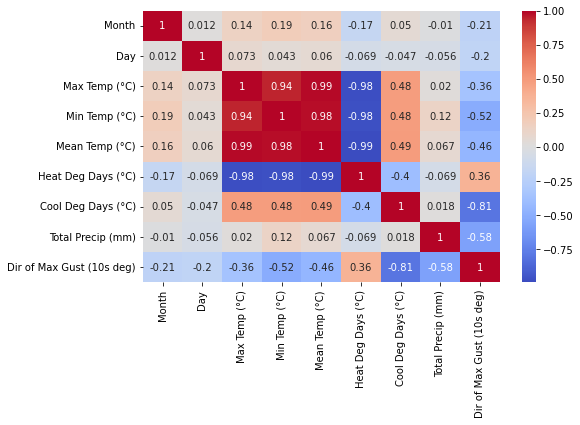

In [128]:
# Creating correlatin Matrix
corr = df_AQ2.corr()

# create a heatmap using Seaborn
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


### <li>3- EXPLORATORY DATA ANALYSIS(EDA):

In [129]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date/Time                    1461 non-null   object 
 1   Air Quality Index            1461 non-null   float64
 2   Carbon Monoxide              1461 non-null   float64
 3   Hydrogen Sulphide            1448 non-null   float64
 4   Methane                      1459 non-null   float64
 5   Nitric Oxide                 1461 non-null   float64
 6   Nitrogen Dioxide             1461 non-null   float64
 7   Non-methane Hydrocarbons     1455 non-null   float64
 8   Outdoor Air Temperature      1461 non-null   float64
 9   Ozone                        1461 non-null   float64
 10  PM10 Mass                    412 non-null    float64
 11  PM2.5 Mass                   1461 non-null   float64
 12  Relative Humidity            1452 non-null   float64
 13  Std. Dev. of Wind 

In [130]:
df4['Date/Time']=df4['Date/Time'].astype('datetime64[ns]')

In [131]:
df4.describe()

Air Quality Index  Carbon Monoxide  Hydrogen Sulphide      Methane  \
count        1461.000000      1461.000000        1448.000000  1459.000000   
mean            2.480162         0.240321           0.000430     2.033454   
std             0.511731         0.088793           0.000394     0.151148   
min             1.477333         0.063900           0.000000     1.022200   
25%             2.176700         0.191300           0.000100     1.953250   
50%             2.405767         0.222233           0.000300     2.017400   
75%             2.671533         0.272233           0.000700     2.092633   
max             7.415000         1.104133           0.002200     3.020800   

       Nitric Oxide  Nitrogen Dioxide  Non-methane Hydrocarbons  \
count   1461.000000       1461.000000               1455.000000   
mean       0.006867          0.012859                  0.101951   
std        0.007501          0.007358                  0.116663   
min        0.000333          0.001467                  0.000000   
25%        0.002633          0.007267                  0.033350   
50%        0.004433          0.010867                  0.068750   
75%        0.008100          0.016750                  0.125150   
max        0.095500          0.041800                  1.927100   

       Outdoor Air Temperature        Ozone   PM10 Mass   PM2.5 Mass  \
count              1461.000000  1461.000000  412.000000  1461.000000   
mean                  6.093405     0.022418   13.661300     8.719096   
std                  11.601815     0.009545   11.247316     8.977521   
min                 -27.983350     0.001333    1.000000     0.472200   
25%                  -1.702050     0.015600    6.708300     4.680533   
50%                   6.484733     0.021767   10.895850     6.867067   
75%                  16.204150     0.028733   16.968725     9.833350   
max                  28.481933     0.051967  125.208300   119.152800   

       Relative Humidity  Std. Dev. of Wind Direction  Sulphur Dioxide  \
count        1452.000000                  1461.000000      1461.000000   
mean           61.827887                    22.258482         0.000737   
std            14.997294                     6.583775         0.000757   
min            19.083300                     9.020850         0.000000   
25%            51.072900                    17.437500         0.000200   
50%            62.541700                    21.014250         0.000550   
75%            73.218725                    25.958300         0.001000   
max            95.083300                    48.583300         0.007000   

       Total Hydrocarbons  Total Oxides Of Nitrogen  Wind Direction  \
count         1461.000000               1461.000000     1461.000000   
mean             2.158484                  0.019724      204.686205   
std              0.193157                  0.013949       58.015487   
min              1.870800                  0.002000       35.291650   
25%              2.041667                  0.010100      165.750000   
50%              2.115933                  0.015533      204.979200   
75%              2.223300                  0.025033      247.520850   
max              4.850000                  0.133267      340.666700   

        Wind Speed  
count  1461.000000  
mean      8.557672  
std       2.970631  
min       3.208350  
25%       6.493750  
50%       8.081250  
75%      10.004150  
max      26.933350

In [132]:
df4.isnull().sum()

Date/Time                         0
Air Quality Index                 0
Carbon Monoxide                   0
Hydrogen Sulphide                13
Methane                           2
Nitric Oxide                      0
Nitrogen Dioxide                  0
Non-methane Hydrocarbons          6
Outdoor Air Temperature           0
Ozone                             0
PM10 Mass                      1049
PM2.5 Mass                        0
Relative Humidity                 9
Std. Dev. of Wind Direction       0
Sulphur Dioxide                   0
Total Hydrocarbons                0
Total Oxides Of Nitrogen          0
Wind Direction                    0
Wind Speed                        0
dtype: int64

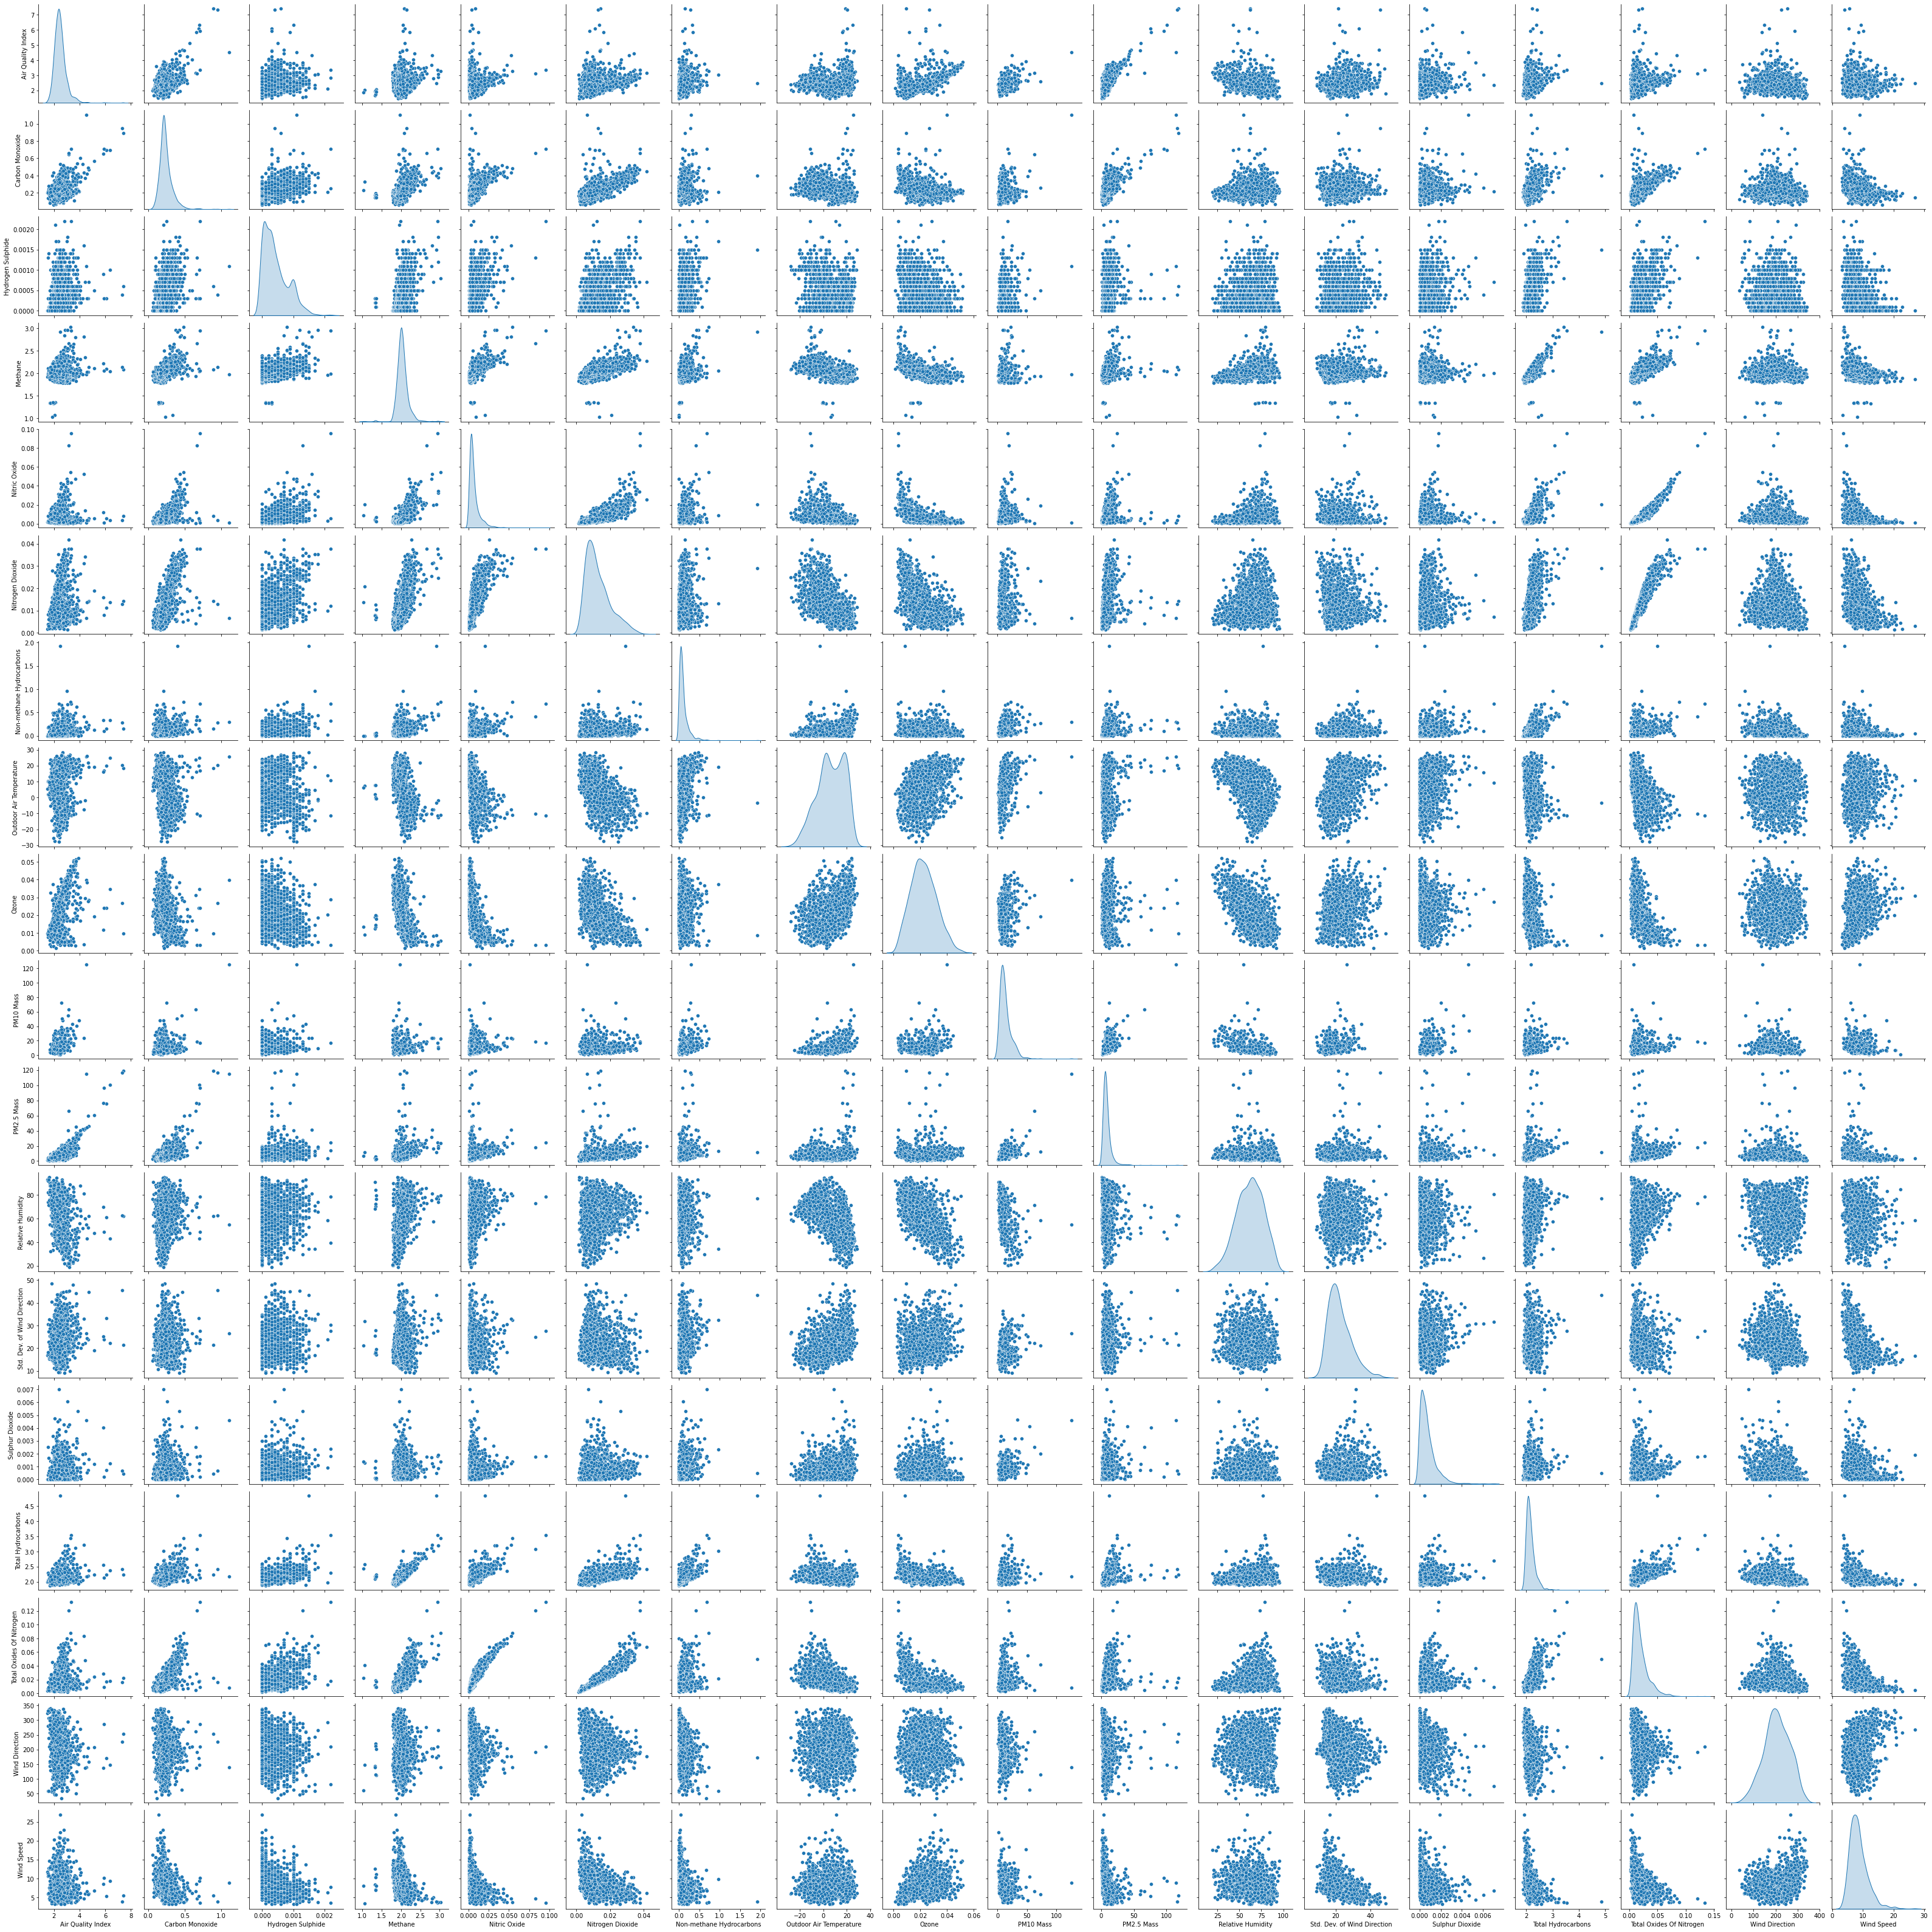

In [133]:
sns.pairplot(df4, diag_kind="kde")

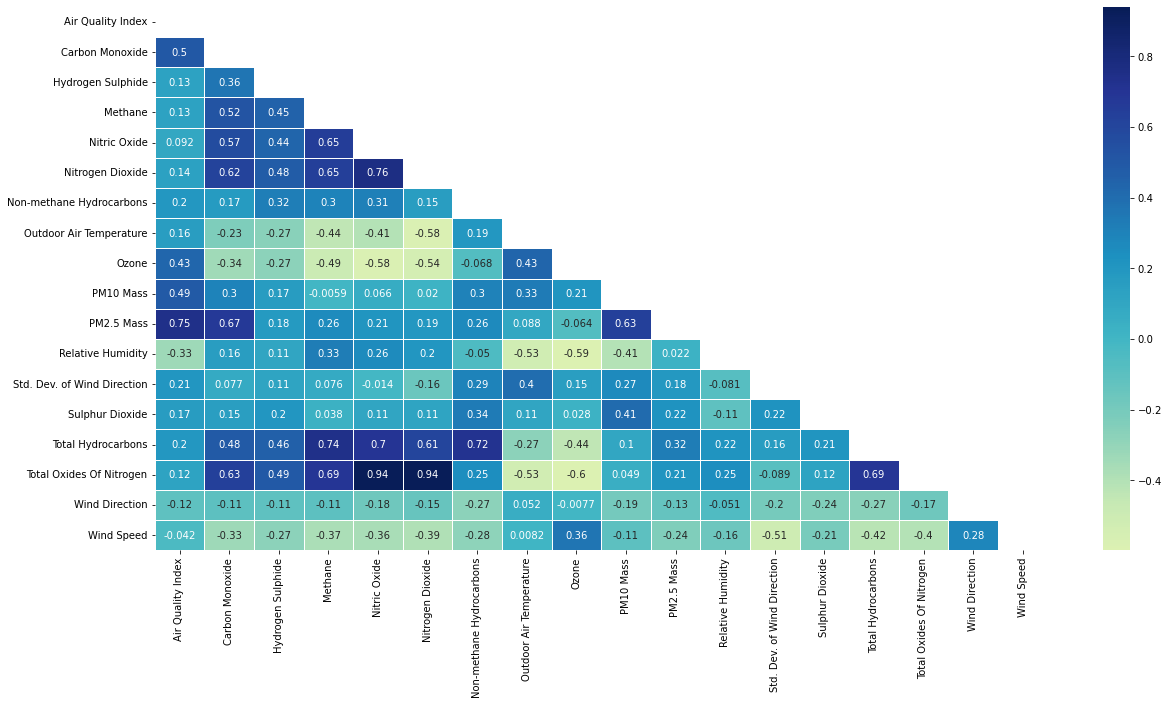

In [134]:
corr_matrix = df4.corr()
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()



In [135]:
df4.head()

Date/Time  Air Quality Index  Carbon Monoxide  Hydrogen Sulphide  Methane  \
0 2015-01-01           2.405967         0.197200             0.0001  1.94790   
1 2015-01-02           2.308133         0.205567             0.0005  2.01040   
2 2015-01-03           2.387533         0.172233             0.0003  2.03125   
3 2015-01-04           2.419300         0.250033             0.0009  2.22500   
4 2015-01-05           2.965700         0.345833             0.0011  2.26250   

   Nitric Oxide  Nitrogen Dioxide  Non-methane Hydrocarbons  \
0      0.002200          0.007067                   0.06665   
1      0.011400          0.017633                   0.09585   
2      0.005867          0.017600                   0.00420   
3      0.012100          0.025067                   0.06670   
4      0.027367          0.032533                   0.17710   

   Outdoor Air Temperature     Ozone  PM10 Mass  PM2.5 Mass  \
0                   2.8167  0.027900     1.0000    2.277767   
1                 -16.1375  0.018600     3.0435    6.213633   
2                 -21.7134  0.018467     4.0417    6.731467   
3                 -24.9458  0.011300     6.8750    8.442467   
4                 -20.1458  0.006267     9.2500   17.488900   

   Relative Humidity  Std. Dev. of Wind Direction  Sulphur Dioxide  \
0            75.8750                     13.79165          0.00120   
1            80.7083                     16.14585          0.00185   
2            70.7500                     14.50000          0.00070   
3            69.9583                     12.77085          0.00100   
4            67.3750                     17.93750          0.00125   

   Total Hydrocarbons  Total Oxides Of Nitrogen  Wind Direction  Wind Speed  
0            2.052767                  0.009267       220.33335    11.92500  
1            2.176400                  0.029033       131.31250    10.11460  
2            2.130567                  0.023433       301.35415     8.05420  
3            2.355567                  0.037167       198.10415     7.36875  
4            2.475000                  0.059833       227.60415     5.97290

In [136]:
import plotly.express as px
fig_CO = px.line(df4, x='Date/Time', y= 'Carbon Monoxide')
fig_CO.show()

In [137]:
fig_AQI = px.line(df4, x='Date/Time', y= 'Air Quality Index')
fig_AQI.show()

In [138]:
fig_PM = px.line(df4, x='Date/Time', y= 'PM2.5 Mass')
fig_PM.show()

In [139]:
fig_NO2 = px.line(df4, x='Date/Time', y= 'Nitrogen Dioxide')
fig_NO2.show()

In [140]:
fig_NO = px.line(df4, x='Date/Time', y= 'Nitric Oxide')
fig_NO.show()

In [141]:
fig_SO = px.line(df4, x='Date/Time', y= 'Sulphur Dioxide')
fig_SO.show()

In [142]:
fig_Ozone = px.line(df4, x='Date/Time', y= 'Ozone')
fig_Ozone.show()

In [143]:
fig_TON = px.line(df4, x='Date/Time', y= 'Total Oxides Of Nitrogen')
fig_TON.show()

In [144]:
fire=pd.read_csv('Wildfire_2015to2018.csv')

In [145]:
fire.head()

fire_number fire_name  fire_year assessment_datetime  assessment_hectares  \
0      CWF010       NaN       2015      2015/5/3 15:00                 0.01   
1      CWF102       NaN       2015     2015/5/27 16:28                 0.01   
2      CWF110       NaN       2015     2015/6/20 11:58                 0.02   
3      CWF134       NaN       2015     2015/7/29 16:00                 0.01   
4      CWF176       NaN       2015     2015/8/11 13:10                 0.03   

   current_size size_class  fire_location_latitude  fire_location_longitude  \
0          0.01          A               51.044850              -115.179167   
1          0.02          A               51.044950              -115.432667   
2          0.02          A               51.145800              -114.927567   
3          0.01          A               51.117133              -114.846750   
4          0.01          A               49.496833              -114.501667   

          fire_origin  ... weather_conditions_over_fire fuel_type  \
0     Provincial Land  ...                        Clear        C3   
1     Provincial Land  ...                       CB Wet        C3   
2     Provincial Land  ...                       CB Dry        M2   
3  Indian Reservation  ...                        Clear        C2   
4     Provincial Land  ...                        Clear        S1   

  other_fuel_type bh_hectares       uc_fs_date uc_hectares to_fs_date  \
0             NaN        0.01   2015/5/3 17:10        0.01        NaN   
1             NaN        0.02  2015/5/27 18:45        0.02        NaN   
2             NaN        0.02  2015/6/20 12:18        0.02        NaN   
3             NaN        0.01  2015/7/29 17:45        0.01        NaN   
4             NaN        0.03  2015/8/11 15:30        0.03        NaN   

   to_hectares       ex_fs_date ex_hectares  
0          NaN   2015/5/3 17:45        0.01  
1          NaN  2015/5/27 19:44        0.02  
2          NaN  2015/6/20 13:55        0.02  
3          NaN  2015/7/30 19:16        0.01  
4          NaN  2015/8/12 11:25        0.01  

[5 rows x 31 columns]

In [146]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fire_number                   2214 non-null   object 
 1   fire_name                     135 non-null    object 
 2   fire_year                     2214 non-null   int64  
 3   assessment_datetime           2214 non-null   object 
 4   assessment_hectares           2214 non-null   float64
 5   current_size                  2214 non-null   float64
 6   size_class                    2214 non-null   object 
 7   fire_location_latitude        2214 non-null   float64
 8   fire_location_longitude       2214 non-null   float64
 9   fire_origin                   2214 non-null   object 
 10  general_cause_desc            2214 non-null   object 
 11  fire_start_date               2214 non-null   object 
 12  det_agent_type                2214 non-null   object 
 13  dis

In [147]:

fire["assessment_datetime"] = pd.to_datetime(fire["assessment_datetime"]).dt.date
fire.head()

fire_number fire_name  fire_year assessment_datetime  assessment_hectares  \
0      CWF010       NaN       2015          2015-05-03                 0.01   
1      CWF102       NaN       2015          2015-05-27                 0.01   
2      CWF110       NaN       2015          2015-06-20                 0.02   
3      CWF134       NaN       2015          2015-07-29                 0.01   
4      CWF176       NaN       2015          2015-08-11                 0.03   

   current_size size_class  fire_location_latitude  fire_location_longitude  \
0          0.01          A               51.044850              -115.179167   
1          0.02          A               51.044950              -115.432667   
2          0.02          A               51.145800              -114.927567   
3          0.01          A               51.117133              -114.846750   
4          0.01          A               49.496833              -114.501667   

          fire_origin  ... weather_conditions_over_fire fuel_type  \
0     Provincial Land  ...                        Clear        C3   
1     Provincial Land  ...                       CB Wet        C3   
2     Provincial Land  ...                       CB Dry        M2   
3  Indian Reservation  ...                        Clear        C2   
4     Provincial Land  ...                        Clear        S1   

  other_fuel_type bh_hectares       uc_fs_date uc_hectares to_fs_date  \
0             NaN        0.01   2015/5/3 17:10        0.01        NaN   
1             NaN        0.02  2015/5/27 18:45        0.02        NaN   
2             NaN        0.02  2015/6/20 12:18        0.02        NaN   
3             NaN        0.01  2015/7/29 17:45        0.01        NaN   
4             NaN        0.03  2015/8/11 15:30        0.03        NaN   

   to_hectares       ex_fs_date ex_hectares  
0          NaN   2015/5/3 17:45        0.01  
1          NaN  2015/5/27 19:44        0.02  
2          NaN  2015/6/20 13:55        0.02  
3          NaN  2015/7/30 19:16        0.01  
4          NaN  2015/8/12 11:25        0.01  

[5 rows x 31 columns]

In [148]:
fire['count']=fire.groupby('assessment_datetime')['fire_number'].transform('count')
fire

fire_number fire_name  fire_year assessment_datetime  \
0         CWF010       NaN       2015          2015-05-03   
1         CWF102       NaN       2015          2015-05-27   
2         CWF110       NaN       2015          2015-06-20   
3         CWF134       NaN       2015          2015-07-29   
4         CWF176       NaN       2015          2015-08-11   
...          ...       ...        ...                 ...   
2209      WWF044       NaN       2018          2018-06-25   
2210      WWF046       NaN       2018          2018-07-11   
2211      WWF048       NaN       2018          2018-07-18   
2212      WWF050       NaN       2018          2018-07-29   
2213      WWF051       NaN       2018          2018-07-29   

      assessment_hectares  current_size size_class  fire_location_latitude  \
0                    0.01          0.01          A               51.044850   
1                    0.01          0.02          A               51.044950   
2                    0.02          0.02          A               51.145800   
3                    0.01          0.01          A               51.117133   
4                    0.03          0.01          A               49.496833   
...                   ...           ...        ...                     ...   
2209                 0.01          0.01          A               54.565000   
2210                 0.01          0.01          A               54.182800   
2211                 0.05          0.55          B               54.016900   
2212                 0.10          0.01          A               54.649083   
2213                 0.01          0.01          A               54.626783   

      fire_location_longitude         fire_origin  ... fuel_type  \
0                 -115.179167     Provincial Land  ...        C3   
1                 -115.432667     Provincial Land  ...        C3   
2                 -114.927567     Provincial Land  ...        M2   
3                 -114.846750  Indian Reservation  ...        C2   
4                 -114.501667     Provincial Land  ...        S1   
...                       ...                 ...  ...       ...   
2209              -115.390050     Provincial Land  ...        C2   
2210              -115.826500     Provincial Land  ...        M2   
2211              -117.071550     Provincial Land  ...        S1   
2212              -115.556383     Provincial Land  ...        C2   
2213              -115.598067     Provincial Land  ...        C2   

     other_fuel_type bh_hectares       uc_fs_date uc_hectares to_fs_date  \
0                NaN        0.01   2015/5/3 17:10        0.01        NaN   
1                NaN        0.02  2015/5/27 18:45        0.02        NaN   
2                NaN        0.02  2015/6/20 12:18        0.02        NaN   
3                NaN        0.01  2015/7/29 17:45        0.01        NaN   
4                NaN        0.03  2015/8/11 15:30        0.03        NaN   
...              ...         ...              ...         ...        ...   
2209             NaN        0.01  2018/6/25 18:20        0.01        NaN   
2210             NaN        0.01  2018/7/11 20:45        0.01        NaN   
2211             NaN        0.55  2018/7/18 21:02        0.55        NaN   
2212             NaN        0.01  2018/7/29 17:52        0.01        NaN   
2213             NaN        0.01  2018/7/29 20:20        0.01        NaN   

     to_hectares       ex_fs_date ex_hectares count  
0            NaN   2015/5/3 17:45        0.01     2  
1            NaN  2015/5/27 19:44        0.02    14  
2            NaN  2015/6/20 13:55        0.02     1  
3            NaN  2015/7/30 19:16        0.01     5  
4            NaN  2015/8/12 11:25        0.01     5  
...          ...              ...         ...   ...  
2209         NaN  2018/6/25 21:30        0.01     7  
2210         NaN  2018/7/12 13:45        0.01     1  
2211         NaN  2018/7/22 15:30        0.55    14  
2212         NaN  2018/7/29 20:17        0.01    13  
2213       

In [149]:
fig4 = px.scatter(fire, x='assessment_datetime',y='count')
fig4.show()


## <li>4- DATA MODELLING AND INFERENCES:

 ### 1- Decision Tree Regressor model by TARA
Following defines a scikit-learn pipeline that includes a Decision Tree Regressor model to predict the Air Quality Index based on various input features. The pipeline includes data preprocessing steps such as imputing missing values and scaling the numeric features.


### 2-  Random Forest model  by TARA
#### <li>(Please refer to Notebook 2018_weather )
<br>Follwoing code builds a scikit-learn pipeline that includes a Random Forest Regressor model to predict the Air Quality Index. The pipeline also includes a feature selection step using Recursive Feature Elimination with Cross-Validation (RFECV) to select the most important features for the model. The GridSearchCV function is used to perform a grid search over a range of hyperparameters for both the Random Forest Regressor and the Decision Tree Regressor (used in the feature selection step).

The clf3 object returned by GridSearchCV is then used to fit the best model on the training data (x_train and y_train) and evaluate it on the test data (x_test and y_test).

The best model obtained from the grid search is stored in the best3 variable. The R-squared score and the root mean squared error (RMSE) of the best model are printed to evaluate the performance of the model on the test data.

Overall, this code performs hyperparameter tuning to optimize the performance of a Random Forest Regressor model for predicting Air Quality Index based on the input features.

### 3 - Stochastic Gradient Descent (SGD) Regressor model BY TARA
The above code defines a scikit-learn pipeline that includes a Stochastic Gradient Descent (SGD) Regressor model to predict the Air Quality Index based on various input features. The pipeline includes data preprocessing steps such as imputing missing values and scaling the numeric features.

The pipeline object is then fitted on the training data (x_train and y_train) and evaluated on the test data (x_test and y_test). The score method of the pipeline object is used to compute the R-squared score of the model on the test data.

The R-squared score indicates the proportion of the variance in the target variable (Air Quality Index) that is predictable from the input features. The higher the R-squared score, the better the model fits the data. The root mean squared error (RMSE) is also computed and printed as an additional evaluation metric. The RMSE indicates the average distance between the predicted and actual values of the target variable.

Overall, this code builds and evaluates a pipeline that includes an SGD Regressor model for predicting Air Quality Index based on the input features

In [150]:
# Define the problem
pm25_mean = df4['PM2.5 Mass'].mean()
pm25_std = df4['PM2.5 Mass'].std()
temperature_mean = df4['Outdoor Air Temperature'].mean()
temperature_std = df4['Outdoor Air Temperature'].std()
humidity_mean = df4['Relative Humidity'].mean()
humidity_std = df4['Relative Humidity'].std()
wind_speed_mean = df4['Wind Speed'].mean()
wind_speed_std = df4['Wind Speed'].std()
CO_mean=df4['Carbon Monoxide'].mean()
CO_std=df4['Carbon Monoxide'].std()
num_simulations = 1000
sim_period = 365


# Define the probability distribution
pm25_distribution = np.random.lognormal(mean=np.log(pm25_mean), sigma=np.log(pm25_std/pm25_mean), size=num_simulations)
temperature_distribution = np.random.normal(loc=temperature_mean, scale=temperature_std, size=num_simulations)
humidity_distribution = np.random.normal(loc=humidity_mean, scale=humidity_std, size=num_simulations)
wind_speed_distribution = np.random.normal(loc=wind_speed_mean, scale=wind_speed_std, size=num_simulations)
co_distribution=np.random.normal(loc=CO_mean, scale=CO_std, size=num_simulations)

# Run the model
aqi_values = []
for i in range(num_simulations):

    # Calculate AQI using the EPA formula
    c_pm25 = pm25_distribution[i]
    c_co = co_distribution[i]
    c = max(c_pm25, c_co)
    ihi = int(round(10 * (0.5 + 0.5 * (c/ 150) ** 3)))
    aqi_values.append(ihi)

# Analyze the results
mean = sum(aqi_values) / num_simulations
std_dev = ((sum((r - mean)**2 for r in aqi_values)) / num_simulations)**0.5
min_val = min(aqi_values)
max_val = max(aqi_values)

print("Mean: {:.2f}".format(mean))
print("Standard deviation: {:.2f}".format(std_dev))
print("Minimum value: {:.2f}".format(min_val))
print("Maximum value: {:.2f}".format(max_val))

Mean: 5.00
Standard deviation: 0.00
Minimum value: 5.00
Maximum value: 5.00


### 4- ARIMA (AutoRegressive Integrated Moving Average) model BY TARA

Follwoing code uses the statsmodels library to fit an ARIMA (AutoRegressive Integrated Moving Average) model to a time series of Air Quality Index data. ARIMA is a popular model for time series forecasting that can be used to model both trends and seasonal patterns in data.

The code first loads the data from an Excel file using Pandas and sets the Date/Time column as the index of the DataFrame. Then, it defines an ARIMA model with an order of (1,1,1), indicating that the model should include one autoregressive term, one differencing term, and one moving average term. The model is then fitted to the Air Quality Index data using the fit method of the ARIMA class.

After the model is fitted, the code uses the predict method to generate predictions for the Air Quality Index values for a future time period, from December 6 to December 12, 2023. The dynamic parameter is set to True, which means that the model will use the predicted values as inputs for subsequent predictions.

Finally, the predictions are printed to the console using the print function.

In [151]:
data=pd.read_csv('Communities AQHI.csv')
data.tail()

Date  Edmonton
8733  Apr 2 2023 06:00 MDT       4.0
8734  Apr 2 2023 07:00 MDT       4.0
8735  Apr 2 2023 08:00 MDT       4.0
8736  Apr 2 2023 09:00 MDT       4.0
8737  Apr 2 2023 10:00 MDT       4.0

In [152]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
# Load the data
data = pd.read_csv('Communities AQHI.csv', index_col='Date', parse_dates=True)

# Fit the ARIMA model
model = sm.tsa.ARIMA(data, order=(1,1,1))
results = model.fit()

# Make predictions
predictions = results.predict(start='2023-04-11', end='2023-04-16', dynamic=False)

# Print predictions
print(predictions)

2023-04-11 00:00:00    3.875114
2023-04-11 01:00:00    3.875114
2023-04-11 02:00:00    3.875114
2023-04-11 03:00:00    3.875114
2023-04-11 04:00:00    3.875114
                         ...   
2023-04-15 20:00:00    3.875114
2023-04-15 21:00:00    3.875114
2023-04-15 22:00:00    3.875114
2023-04-15 23:00:00    3.875114
2023-04-16 00:00:00    3.875114
Freq: H, Name: predicted_mean, Length: 121, dtype: float64


### 5- SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) model BY TARA
This code uses the SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) model from the statsmodels library to forecast future values of the "Air Quality Index" variable in the "Final_data.xlsx" dataset.

The SARIMAX model is a time series forecasting model that is an extension of the ARIMA model. It allows for the inclusion of seasonal components in the model and is useful for datasets with seasonal patterns.

In this code, the SARIMAX model is fitted to the "Air Quality Index" variable in the data DataFrame with an order of (1,1,1) for the non-seasonal component and a seasonal order of (1,1,1,7) with a period of 7 days. The results.predict() method is used to generate predictions for future dates between 2023-04-09 and 2023-04-15, inclusive.

In [153]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd


# Fit SARIMA model
model = SARIMAX(data['Edmonton'], order=(1,1,1), seasonal_order=(1,1,1,7))
results = model.fit()

# Make predictions
predictions = results.predict(start='2023-04-09', end='2023-04-15', dynamic=True)

# Print predictions
print(predictions)

2023-04-09 00:00:00    3.940461
2023-04-09 01:00:00    3.937170
2023-04-09 02:00:00    3.929870
2023-04-09 03:00:00    3.905752
2023-04-09 04:00:00    3.908081
                         ...   
2023-04-14 20:00:00    3.961409
2023-04-14 21:00:00    3.958119
2023-04-14 22:00:00    3.950819
2023-04-14 23:00:00    3.926701
2023-04-15 00:00:00    3.929029
Freq: H, Name: predicted_mean, Length: 145, dtype: float64


### 6- Vector Autoregressive (VAR) BY ELSA
Vector Autoregressive (VAR) is a statistical model used to capture the linear interdependencies among multiple time series variables. It is an extension of the univariate autoregressive (AR) model to multivariate time series data. In a VAR model, each variable is modeled as a linear combination of its own lagged values and the lagged values of other variables in the system.

### INFERENCE: 
The main idea behind VAR models is to capture the dynamic relationships among multiple variables over time. They are commonly used in econometrics, finance, and other fields where multiple time series variables influence each other.
we might not choose to use a VAR model for certain time series forecasting tasks. The model can become complex as the number of time series variables and lags increase, potentially leading to overfitting and difficulties in interpretation. Additionally, while VAR models can capture seasonality by including seasonal lags, this approach is indirect and may not be as effective as other techniques. Moreover, VAR models require stationary time series data, necessitating additional preprocessing steps if the data is non-stationary. Finally, they work best with large sample sizes and do not explicitly capture causality between variables, relying instead on correlations that may not imply causality.

### 7- SARIMA (Seasonal Autoregressive Integrated Moving Average) model BY SHIKHA
This code performs time series analysis using SARIMA (Seasonal Autoregressive Integrated Moving Average) model to predict the Air Quality Index for a specified date range.

The data is loaded and resampled to daily frequency, and missing values are filled using the 'pad' method. The columns of interest are selected and split into training and testing sets.

Then, the order of the SARIMA model is defined, and exogenous data is obtained for the specified date range. If there is any row in the exogenous data, the SARIMA model is fit to the training data with the exogenous data, and the predictions for the specified period are generated using the fitted model. Finally, the predicted AQI values are printed.

### INFERENCE: 
It appears that the model is predicting the daily Air Quality Index (AQI) values for the year 2018, and the predictions range from approximately 1.9 to 2.9. The fact that there is little variation in the predicted values could suggest that the model is not effectively capturing any underlying patterns or trends in the data. It's possible that additional variables or more complex modeling techniques could lead to more accurate and varied predictions.

### 8- SARIMAX model BY SHIKHA
This is a SARIMAX model from the statsmodels package in Python. SARIMAX stands for Seasonal Autoregressive Integrated Moving Average with Exogenous Variables. This model is a time series forecasting model that includes the effects of external or exogenous variables that may have an impact on the variable being forecasted, in this case, the air quality index (AQI).

The model is fitted to the historical data of AQI values and exogenous variables. Once the model is fitted, it is used to generate a forecast for the next 12 months or steps. The forecast method of the results object is used to generate the forecasted AQI values for the next year based on the fitted SARIMAX model.

### INFERENCE: 
Based on the results obtained, it seems that the SARIMAX model with exogenous variables is performing better than the SARIMAX model without exogenous variables. The SARIMAX model with exogenous variables was able to capture more variations in the data, as seen from the smaller errors in the predictions. Therefore, it can be inferred that the inclusion of exogenous variables in the model has improved its performance. but the values have almost the same which is not true in general therefore not using this model for final prediction.

### 9 - Facebook Prophet BY SHIKHA
This is a time series forecasting model using Facebook Prophet, which is a popular open-source library for time series forecasting. The model is trained on a historical dataset with various exogenous variables or regressors, such as Carbon Monoxide, Methane, Nitric Oxide, etc., and it is used to predict the Air Quality Index for the test period. The model also adds daily seasonality to the forecast using the daily_seasonality=True parameter. The add_regressor() function is used to add each of the exogenous variables to the model. The model is fitted to the training data using the fit() function, and predictions are made for the test data using the predict() function. The predicted AQI values, along with their lower and upper bounds, are printed using the forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']] command.

### INFERENCE: 
<br>MSE: 0.02681647560396771
<br>The Prophet model is a powerful time series forecasting model that can capture complex seasonal patterns and trends, as well as incorporate additional regressors to improve forecast accuracy. By adding multiple regressors like Carbon Monoxide, Methane, Nitric Oxide, Nitrogen Dioxide, Outdoor Air Temperature, Ozone, PM2.5 Mass, Sulphur Dioxide, and Std. Dev. of Wind Direction to the model, it can better capture the impact of these variables on the target variable, Air Quality Index (AQI).

The above implementation fits the Prophet model to the training data up to the end of 2018 and then makes predictions for the test data for the year 2019. The resulting forecast contains the predicted AQI values along with the upper and lower bounds of the confidence interval.

Therefore, we can infer that the Prophet model with additional regressors has the potential to improve the accuracy of AQI forecasting compared to simpler models like SARIMA, especially when the underlying data is complex and affected by multiple factors.

### 10 - Seasonal exponential smoothing model BY SHIKHA
This is a seasonal exponential smoothing model implemented using the Holt-Winters method. The model is trained on the historical air quality index data for the years 2012-2017 and used to predict the air quality index values for the year 2018. The model uses the seasonal='add' option to capture the additive seasonal effect of air pollution on a daily basis. The seasonal period is set to 365 days, indicating that the model is taking into account the annual seasonality in air pollution. The model is evaluated using the root mean squared error (RMSE) and mean absolute percentage error (MAPE) metrics. Finally, the model is used to make future predictions for air pollution levels.



### INFERENCE: 
RMSE: 0.8861397461695634
<br>MAPE: 18.721648778492536
<br>The forcasting values that are almost similar with little variance therefore it cannot be trusted for final prediction.

###  11- Long Short-Term Memory (LSTM) neural network model BY SHIKHA

LSTMs are a type of recurrent neural network (RNN) that can remember past information and use it to make predictions. They are particularly useful for time series data like the pollution data in this example, where past observations can be used to predict future values.

LSTM models can capture both short-term and long-term dependencies in the data, making them well-suited for time series prediction tasks. They are also capable of handling non-linear relationships between inputs and outputs, which can be useful when dealing with complex, real-world data.

One potential downside of LSTM models is that they can be computationally expensive to train, particularly when working with large datasets. Additionally, they can be difficult to interpret, which may make it challenging to understand how the model is making its predictions.
### INFERENCE: 
This model was was showing 'ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,17)' on our data

## <li> FINAL MODEL: PROPHET 

For this project, we explored FBProphet model in forecasting AQI in Edmonton.

Facebook Prophet is a time series forecasting model developed by Facebook's Core Data Science team in 2017. It is designed to be a robust and efficient tool for forecasting time series data with strong seasonal effects, as well as trends that can be modeled using linear or non-linear functions. The model is built on the idea of decomposing time series data into three components: trend, seasonality, and noise, which are then modeled separately and combined to make predictions. Prophet uses Bayesian inference to fit the model and provides various options for customization, including the ability to incorporate holidays and custom seasonalities. It has gained widespread popularity in the business and data science communities due to its ease of use, flexibility, and ability to handle large datasets with missing values and outliers.

In [154]:
# import the FB Prophet Library
from prophet import Prophet as fbProphet

We tested this model on two (2) datasets, updated_dataset_csv and the Communities AQHI csv files.

We tried training FB Prophet model for each parameter. We wanted to try if we can build models that can have accurate predictions on parameters.

In [155]:
pivoted_df3 = pd.read_csv('updated_dataset.csv')
pivoted_df3['Date/Time']=pivoted_df3['Date/Time'].astype('datetime64[ns]')
pivoted_df3.dropna(inplace=True)

<AxesSubplot:xlabel='ds', ylabel='y'>

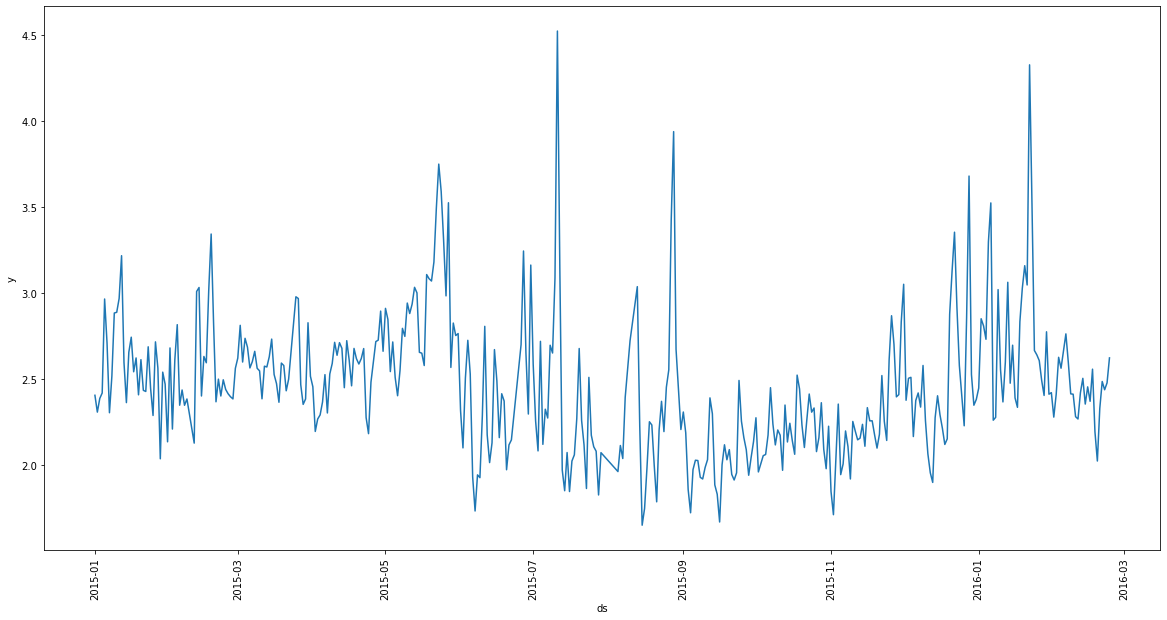

In [156]:
AQI_forecast3 = pivoted_df3[['Date/Time', 'Air Quality Index']]
#AQI_forecast3.set_index('Date/Time', inplace=True)
AQI_forecast3.rename(columns={"Date/Time": "ds", "Air Quality Index": "y"}, inplace=True)
AQI_forecast3['ds'] = AQI_forecast3['ds'].dt.tz_localize(None)
AQI_forecast3.head()
plt.xticks(rotation=90)
sns.lineplot(x=AQI_forecast3.ds, y=AQI_forecast3["y"])

In [157]:
# Convert index to pd.DatetimeIndex
train, test = temporal_train_test_split(AQI_forecast3, test_size=30)

AQIprophet = fbProphet(daily_seasonality=True)
#AQIprophet.add_regressor('Open')

AQIprophet.add_country_holidays(country_name="Canada")
AQIprophet.add_seasonality(name="weekly", fourier_order=15, period=7)


#AQIprophet.add_regressor("Volume")
#AQIprophet.add_regressor("Dividends")
#AQIprophet.add_regressor("Stock Splits")

AQIprophet.fit(train)
preds = AQIprophet.predict(test)
preds.index = test.index
#preds

plot_series(train["y"], test["y"], preds["yhat"], labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(preds["yhat"], test["y"])

NameError: name 'temporal_train_test_split' is not defined

In [ ]:
parameter_list = ['Outdoor Air Temperature', 'Nitric Oxide', 'Nitrogen Dioxide', 'Sulphur Dioxide', 'PM2.5 Mass', 'Ozone', 'Carbon Monoxide', 'Air Quality Index']

In [ ]:
prophet_models = {}

for param in parameter_list:
    # Create a new DataFrame for the current parameter
    param_df = pivoted_df3[['Date/Time', param]]
    param_df.rename(columns={"Date/Time": "ds", param: "y"}, inplace=True)
    param_df['ds'] = param_df['ds'].dt.tz_localize(None)
    
    # Split the data into training and testing sets
    train, test = temporal_train_test_split(param_df, test_size=30)
    
    # Create a new fbProphet model and fit it to the training data
    prophet_model = fbProphet(daily_seasonality=True)
    prophet_model.add_country_holidays(country_name="Canada")
    prophet_model.add_seasonality(name="weekly", fourier_order=15, period=7)
    prophet_model.add_seasonality(name="monthly")
    prophet_model.fit(train)
    
    # Use the fitted model to make predictions on the test data
    preds = prophet_model.predict(test)
    preds.index = test.index
    
    # Store the model in the dictionary with the parameter name as the key
    prophet_models[param] = prophet_model

In [ ]:
prophet_models

In [ ]:
forecasted_values = pd.DataFrame()

for param in parameter_list:
    # Create a new DataFrame for the current parameter
    param_df = pivoted_df3[['Date/Time', param]]
    param_df.rename(columns={"Date/Time": "ds", param: "y"}, inplace=True)
    param_df['ds'] = param_df['ds'].dt.tz_localize(None)
    
    # Create a new future DataFrame with 30 days of daily frequency starting from Jan 1, 2018
    start_date = pd.Timestamp('2018-01-01')
    end_date = pd.Timestamp('2018-01-14')
    future = pd.DataFrame({'ds': pd.date_range(start=start_date, end=end_date, freq='D')})
    future['ds'] = future['ds'].dt.tz_localize(None)
    
    # Use the fitted model to make predictions on the future data
    forecast = prophet_models[param].predict(future)
    
    # Extract the relevant columns from the forecast DataFrame
    forecast = forecast[['ds', 'yhat']]
    forecast.rename(columns={"yhat": param}, inplace=True)
    
    # Append the forecasted values to the forecasted_values DataFrame
    forecasted_values = pd.concat([forecasted_values, forecast.set_index('ds')], axis=1)

In [ ]:
forecasted_values

Since FB Prophet, like other time series models, rely heavily on historical data to capture trends over the past, we opted to find a a more recnt dataset to try the model on. The Communities AQHI data has hourly readings of Edmonton AQI from April 3, 2022 to April 2, 2023,

In [ ]:
# read the csv file
df3 = pd.read_csv('Communities AQHI.csv')

In [ ]:
# check the first 5 rows
df3.head()

In [ ]:
# getting some information on the data
df3.info()

In [ ]:
# setting the Date column as a datetime type
df3['Date']=df3['Date'].astype('datetime64[ns]')

The FB Prophet model takes in only two columns, 'ds' and 'y'. We have to rename the columns on our dataset as such when building the model.

In [ ]:
df3.rename(columns={"Date": "ds", "Edmonton": "y"}, inplace=True)
df3['ds'] = df3['ds'].dt.tz_localize(None)
df3.head()
plt.xticks(rotation=90)
sns.lineplot(x=df3.ds, y=df3["y"])

In [ ]:
# Convert index to pd.DatetimeIndex
train, test = temporal_train_test_split(df3, test_size=24*7)

AQI3 = fbProphet(daily_seasonality=True)
#AQIprophet.add_regressor('Open')

AQI3.add_country_holidays(country_name="Canada")
AQI3.add_seasonality(name="weekly", fourier_order=15, period=7)


#AQIprophet.add_regressor("Volume")
#AQIprophet.add_regressor("Dividends")
#AQIprophet.add_regressor("Stock Splits")

AQI3.fit(train)
preds = AQI3.predict(test)
preds.index = test.index
#preds

plot_series(train["y"], test["y"], preds["yhat"], labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(preds["yhat"], test["y"])

In [ ]:
start_date = pd.Timestamp('2023-04-15')
end_date = pd.Timestamp('2023-04-30')
future_dates = pd.date_range(start=start_date, end=end_date, freq='H')
future_df2 = pd.DataFrame({'ds': future_dates})
future_df2['ds']=future_df2['ds'].astype('datetime64[ns]')
future_df2['ds'] = future_df2['ds'].dt.tz_localize(None)

In [ ]:
future_df2

In [ ]:
future_preds = AQI3.predict(future_df2)

In [ ]:
future_preds

In [ ]:
future_preds.info()

In [ ]:
dff = future_preds[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
dff

In [ ]:
future = AQI3.make_future_dataframe(periods=14, freq= 'd')
forecast = AQI3.predict(future)
fig = AQI3.plot(forecast)

In [ ]:
forecast

In [ ]:
forecast.tail(14)

In [ ]:
fig2 = AQI3.plot_components(forecast)

In [ ]:
from prophet.diagnostics import cross_validation
AQI3 = fbProphet(daily_seasonality=True)
AQI3.add_country_holidays(country_name="Canada")
AQI3.add_seasonality(name="weekly", fourier_order=5, period=4)

AQI3.fit(df3)

df_cv = cross_validation(AQI3, initial='300 days', period='180 days', horizon = '60 days')
df_cv.head()

In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:
df_p

In [ ]:
sns.lineplot(data=df_p, x="horizon", y="mape")

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')